# Stochastic degradation model

This example shows how the stochastic degradation model can be used.
This model describes the stochastic process of a single chemical reaction, in which the concentration of a substance degrades over time as particles react.
The substance degrades starting from an initial concentration, n_0, to 0 following a rate constant, k, according to the following model (Erban et al., 2007):
   $$A \xrightarrow{\text{k}} \emptyset$$

The model is simulated according to the Gillespie stochastic simulation algorithm (Gillespie, 1976)
   1. Sample a random value r from a uniform distribution: r ~ unif(0,1)
   2. Calculate the time ($\tau$) until the next single reaction as follows (Erban et al., 2007):
   $$ \tau = \frac{1}{A(t)k} \ln{\big[\frac{1}{r}\big]} $$
   3. Update the molecule count at time t + $\tau$ as: $ A(t + \tau) = A(t) - 1 $
   4. Return to step (1) until molecule count reaches 0
   

In [1]:
import pints
import pints.toy
import matplotlib.pyplot as plt
import numpy as np
import math

Specify initial concentration, time points at which to record concentration values, and rate constant value (k)

In [2]:
n_0 = 20
model = pints.toy.StochasticDegradationModel(n_0)

In [3]:
times = np.linspace(0, 100, 100)
k = [0.1]

values = model.simulate(k, times)

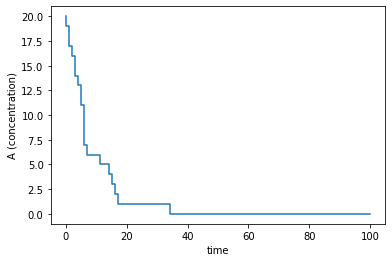

In [4]:
plt.step(times, values)
plt.xlabel('time')
plt.ylabel('A (concentration)')
plt.show()

Given the stochastic nature of this model, every iteration returns a different result. However, averaging the concentration values at each time step, produces a reproducible result which tends towards a deterministic function as the the number of iterations tends to infinity (Erban et al., 2007): $ n_0e^{-kt} $


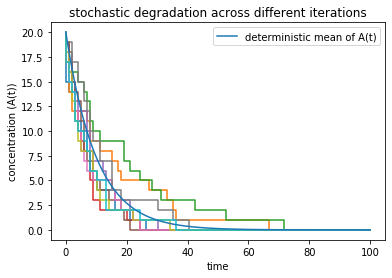

In [5]:
for i in range(10):
    values = model.simulate(k, times)
    plt.step(times, values)

mean = model.deterministic_mean(k, times)
    
plt.plot(times, mean, label = 'deterministic mean of A(t)')
plt.title('stochastic degradation across different iterations')
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.legend(loc = 'upper right')
plt.show()

The deterministic mean (from above) is plotted with the deterministic standard deviation. 
The deterministic variance of this model is given by: $e^{-2kt}(-1 + e^{kt})n_0$

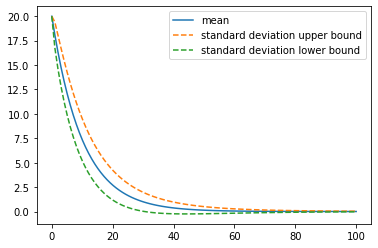

In [16]:
mean = model.deterministic_mean(k, times)
variance = model.deterministic_variance(k, times)
std_dev = np.sqrt(variance)

plt.plot(times, mean, '-', label = 'mean')
plt.plot(times, mean + std_dev, '--', label = 'standard deviation upper bound')
plt.plot(times, mean - std_dev, '--', label = 'standard deviation lower bound')
plt.legend(loc = 'upper right')
plt.show()